# Momentum Trading Strategy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
gld = yf.download('GLD', start='2016-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
day = np.arange(1,len(gld)+1)
gld['Day'] = day
gld.head()

,Open,High,Low,Close,Adj Close,Volume,Day
Date,,,,,,,
2016-01-04 00:00:00-05:00,103.129997,103.669998,102.489998,102.889999,102.889999,6440000,1
2016-01-05 00:00:00-05:00,103.129997,103.459999,102.930000,103.180000,103.180000,3500300,2
2016-01-06 00:00:00-05:00,104.370003,104.800003,103.930000,104.669998,104.669998,9316600,3
2016-01-07 00:00:00-05:00,105.830002,106.239998,105.190002,106.150002,106.150002,11730400,4
2016-01-08 00:00:00-05:00,105.480003,105.800003,105.040001,105.680000,105.680000,7678200,5


In [5]:
gld = gld[['Day', 'High', 'Low','Open', 'Close']]
gld.head()

,Day,High,Low,Open,Close
Date,,,,,
2016-01-04 00:00:00-05:00,1,103.669998,102.489998,103.129997,102.889999
2016-01-05 00:00:00-05:00,2,103.459999,102.930000,103.129997,103.180000
2016-01-06 00:00:00-05:00,3,104.800003,103.930000,104.370003,104.669998
2016-01-07 00:00:00-05:00,4,106.239998,105.190002,105.830002,106.150002
2016-01-08 00:00:00-05:00,5,105.800003,105.040001,105.480003,105.680000


In [6]:
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1821 entries, 2016-01-04 00:00:00-05:00 to 2023-03-28 00:00:00-04:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     1821 non-null   int64  
 1   High    1821 non-null   float64
 2   Low     1821 non-null   float64
 3   Open    1821 non-null   float64
 4   Close   1821 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 85.4 KB


In [12]:
gld['9-day'] = gld['Close'].rolling(9).mean().shift()
gld['21-day'] = gld['Close'].rolling(21).mean().shift()

In [13]:
gld['signal'] = np.where(gld['9-day']>gld['21-day'],1,0)
gld['signal'] = np.where(gld['9-day']<gld['21-day'],-1,gld['signal'])
gld.dropna(inplace = True)

In [14]:
gld['return'] = np.log(gld['Close']).diff()
gld['system_return'] = gld['signal'] * gld['return']
gld['entry'] = gld.signal.diff()
gld.head()

,Day,High,Low,Open,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2016-03-04 00:00:00-05:00,43,122.370003,120.220001,121.129997,120.540001,117.907778,116.129524,1,NaN,NaN,NaN
2016-03-07 00:00:00-05:00,44,121.580002,120.410004,121.180000,121.139999,118.468889,116.667143,1,0.004965,0.004965,0.0
2016-03-08 00:00:00-05:00,45,121.879997,120.470001,121.790001,120.580002,118.904444,117.170476,1,-0.004633,-0.004633,0.0
2016-03-09 00:00:00-05:00,46,120.389999,118.839996,119.199997,119.580002,119.234445,117.563810,1,-0.008328,-0.008328,0.0
2016-03-10 00:00:00-05:00,47,121.760002,120.419998,120.500000,121.500000,119.418889,117.837619,1,0.015929,0.015929,0.0


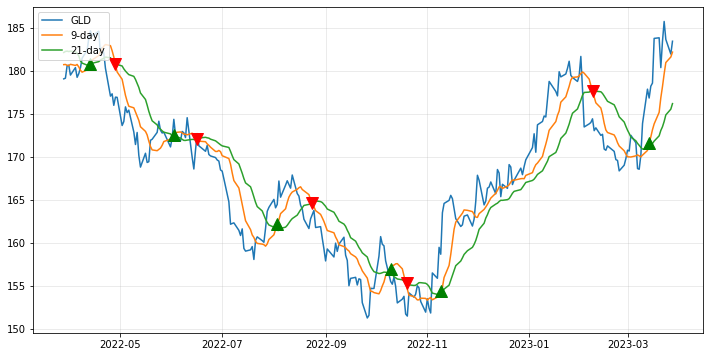

In [15]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[-252:]['Close'], label = 'GLD')
plt.plot(gld.iloc[-252:]['9-day'], label = '9-day')
plt.plot(gld.iloc[-252:]['21-day'], label = '21-day')
plt.plot(gld[-252:].loc[gld.entry == 2].index, gld[-252:]['9-day'][gld.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(gld[-252:].loc[gld.entry == -2].index, gld[-252:]['21-day'][gld.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

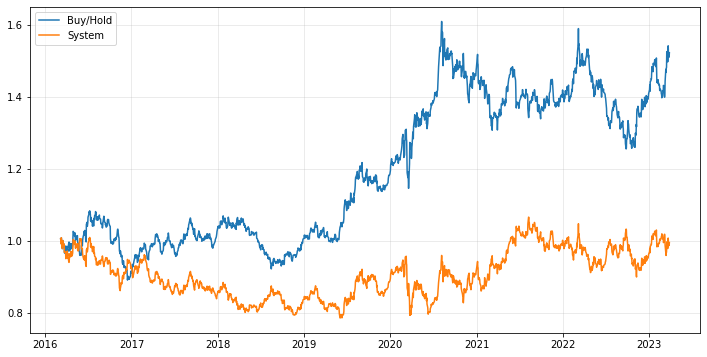

In [16]:
plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)